<a href="https://colab.research.google.com/github/AyaTareekAhmmeed/Graduation-Project-/blob/main/dl_diabetic_retinopathy_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/train.csv
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/export.pkl
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/f481f76a6b75.png
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/abdb365cacbc.png
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/33ffddea8c6e.png
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/059bc89df7f4.png
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/278aa860dffd.png
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/d66b6f333dc7.png
/kaggle/i

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from time import perf_counter
import seaborn as sns

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))

In [ ]:
# Add an additional column, mapping to the type
df = pd.read_csv(r'../input/diabetic-retinopathy-224x224-gaussian-filtered/train.csv')

diagnosis_dict_binary = {
    0: 'No_DR',
    1: 'DR',
    2: 'DR',
    3: 'DR',
    4: 'DR'
}

diagnosis_dict = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}


df['binary_type'] =  df['diagnosis'].map(diagnosis_dict_binary.get)
df['type'] = df['diagnosis'].map(diagnosis_dict.get)
df.head()

,id_code,diagnosis,binary_type,type
0,000c1434d8d7,2,DR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,DR,Mild
3,002c21358ce6,0,No_DR,No_DR
4,005b95c28852,0,No_DR,No_DR


<AxesSubplot:>

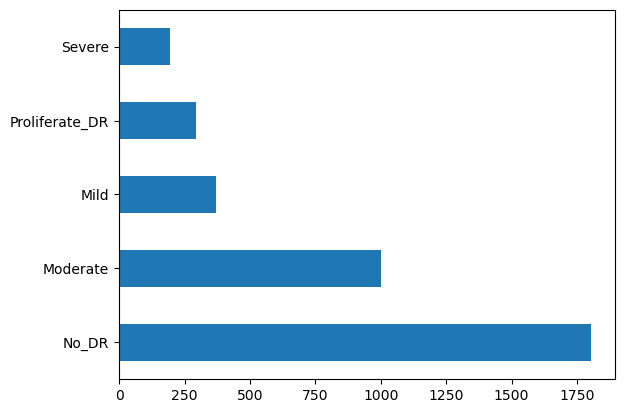

In [ ]:
df['type'].value_counts().plot(kind='barh')

<AxesSubplot:>

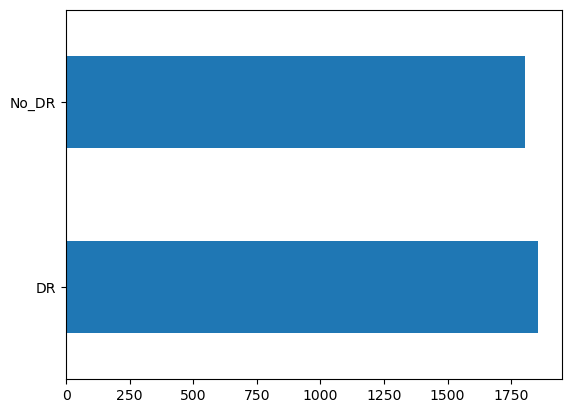

In [ ]:
df['binary_type'].value_counts().plot(kind='barh')

In [ ]:
# Split into stratified train, val, and test sets
train_intermediate, val = train_test_split(df, test_size = 0.15, stratify = df['type'], shuffle =True)
train, test = train_test_split(train_intermediate, shuffle =True, test_size = 0.15 / (1 - 0.15), stratify = train_intermediate['type'])

print(train['type'].value_counts(), '\n')
print(test['type'].value_counts(), '\n')
print(val['type'].value_counts(), '\n')

No_DR             1263
Moderate           699
Mild               258
Proliferate_DR     207
Severe             135
Name: type, dtype: int64 

No_DR             271
Moderate          150
Mild               56
Proliferate_DR     44
Severe             29
Name: type, dtype: int64 

No_DR             271
Moderate          150
Mild               56
Proliferate_DR     44
Severe             29
Name: type, dtype: int64 



In [ ]:
import shutil
from matplotlib.image import imread
# Create working directories for train/val/test
base_dir = ''

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
os.makedirs(train_dir)

if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
os.makedirs(val_dir)

if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
os.makedirs(test_dir)

In [ ]:
# Copy images to respective working directory
src_dir = r'../input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images'
for index, row in train.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(train_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

for index, row in val.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(val_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)
 
for index, row in test.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(test_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

In [ ]:
# Setting up ImageDataGenerator for train/val/test 
from keras.preprocessing.image import ImageDataGenerator

train_path = 'train'
val_path = 'val'
test_path = 'test'

train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path, target_size=(224,224), shuffle = True)
val_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(val_path, target_size=(224,224), shuffle = True)
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path, target_size=(224,224), shuffle = False)

Found 2562 images belonging to 2 classes.
Found 550 images belonging to 2 classes.
Found 550 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers
# creating a CNN module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

from keras.utils import plot_model

model = tf.keras.Sequential([
    layers.Conv2D(8, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.Conv2D(8, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.Conv2D(8, (3,3), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(16, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.Conv2D(16, (3,3), padding="same", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(32, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.Conv2D(32, (3,3), padding="same", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dropout(0.15),
    layers.Dense(2, activation = 'softmax')
])
# summarize model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       32        
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 8)       72        
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 8)       584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 8)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 8)      32        
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 16)      1

In [ ]:
batch_size = 50 #split training data into n batches for higher performance 
epochs = 40 #one forward%backward pass of all training examples

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy']
              )

history  = model.fit(train_batches,
          epochs=epochs,
           verbose=1,
          validation_data=val_batches,
          batch_size=batch_size)

Epoch 1/40
81/81 [==============================] - 98s 1s/step - loss: 0.3578 - accuracy: 0.8439 - val_loss: 0.6996 - val_accuracy: 0.5073
Epoch 2/40
81/81 [==============================] - 94s 1s/step - loss: 0.2538 - accuracy: 0.9012 - val_loss: 0.7224 - val_accuracy: 0.4927
Epoch 3/40
81/81 [==============================] - 93s 1s/step - loss: 0.2224 - accuracy: 0.9212 - val_loss: 0.7390 - val_accuracy: 0.4927
Epoch 4/40
81/81 [==============================] - 93s 1s/step - loss: 0.2038 - accuracy: 0.9329 - val_loss: 0.7064 - val_accuracy: 0.8727
Epoch 5/40
81/81 [==============================] - 92s 1s/step - loss: 0.1904 - accuracy: 0.9356 - val_loss: 0.6285 - val_accuracy: 0.5655
Epoch 6/40
81/81 [==============================] - 92s 1s/step - loss: 0.1749 - accuracy: 0.9450 - val_loss: 0.4787 - val_accuracy: 0.8327
Epoch 7/40
81/81 [==============================] - 91s 1s/step - loss: 0.1659 - accuracy: 0.9465 - val_loss: 0.3008 - val_accuracy: 0.8945
Epoch 8/40
81/81 [==

In [ ]:
loss, acc = model.evaluate_generator(test_batches, verbose=1)
print("Loss: ", loss)
print("Accuracy: ", acc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


18/18 [==============================] - 4s 209ms/step - loss: 0.2177 - accuracy: 0.9400
Loss:  0.2176896184682846
Accuracy:  0.9399999976158142


In [ ]:
#saving model to reuse its weights
model.save("eye_disease_model.h5")
model.save("eye_disease_model.pkl")
model.save('eye_disease_model.model')


print('saved')

saved


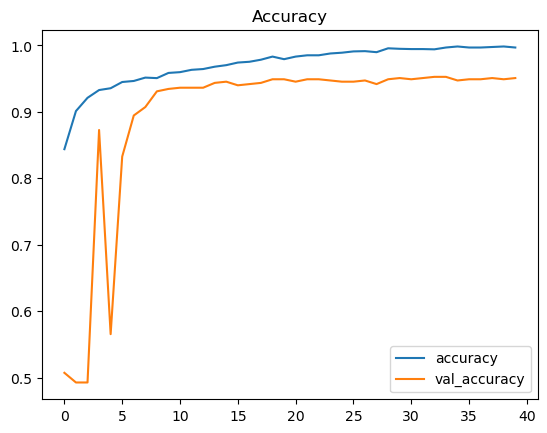

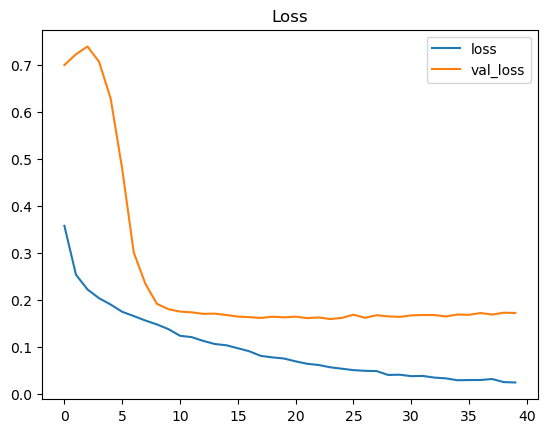

 ## Test Loss: 0.21769

## Accuracy on the test set: 94.00%



18/18 [==============================] - 4s 204ms/step


In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

results = model.evaluate(test_batches, verbose=0)

printmd(" ## Test Loss: {:.5f}".format(results[0]))
printmd("## Accuracy on the test set: {:.2f}%".format(results[1] * 100))
print('\n')

# Predict the label of the test_images
pred = model.predict(test_batches)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_batches.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]


In [ ]:
# import necessary layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

from tensorflow.keras import Model

# input  
input = Input(shape =(224,224,3))

model2 = tf.keras.Sequential([
    layers.Conv2D(8, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.Conv2D(8, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2, 2)),
    
    layers.Conv2D(16, (3,3), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.Conv2D(16, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2, 2)),
    
    layers.Conv2D(32, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.Conv2D(32, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.Conv2D(32, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2, 2)),

    layers.Conv2D(64, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.Conv2D(64, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.Conv2D(64, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dropout(0.15),
    layers.Dense(2, activation = 'softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 224, 224, 8)       32        
                                                                 
 conv2d_8 (Conv2D)           (None, 224, 224, 8)       72        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 8)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 16)      272       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                  

In [ ]:
batch_size = 50 #split training data into n batches for higher performance 
epochs = 50 #one forward%backward pass of all training examples

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy']
              )

historyVGG  = model2.fit(train_batches,
          epochs=epochs,
           verbose=1,
          validation_data=val_batches,
          batch_size=batch_size)

Epoch 1/50
81/81 [==============================] - 47s 542ms/step - loss: 0.6927 - accuracy: 0.5406 - val_loss: 0.6921 - val_accuracy: 0.7127
Epoch 2/50
81/81 [==============================] - 43s 531ms/step - loss: 0.6916 - accuracy: 0.6491 - val_loss: 0.6907 - val_accuracy: 0.8782
Epoch 3/50
81/81 [==============================] - 43s 526ms/step - loss: 0.6896 - accuracy: 0.7342 - val_loss: 0.6880 - val_accuracy: 0.8655
Epoch 4/50
81/81 [==============================] - 43s 527ms/step - loss: 0.6865 - accuracy: 0.7592 - val_loss: 0.6838 - val_accuracy: 0.8764
Epoch 5/50
81/81 [==============================] - 43s 526ms/step - loss: 0.6808 - accuracy: 0.7603 - val_loss: 0.6768 - val_accuracy: 0.8764
Epoch 6/50
81/81 [==============================] - 43s 529ms/step - loss: 0.6729 - accuracy: 0.7990 - val_loss: 0.6664 - val_accuracy: 0.8764
Epoch 7/50
81/81 [==============================] - 43s 529ms/step - loss: 0.6605 - accuracy: 0.8470 - val_loss: 0.6514 - val_accuracy: 0.8764

In [ ]:
loss, acc = model2.evaluate_generator(test_batches, verbose=1)
print("Loss: ", loss)
print("Accuracy: ", acc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


18/18 [==============================] - 2s 118ms/step - loss: 0.2633 - accuracy: 0.8818
Loss:  0.2632744014263153
Accuracy:  0.8818181753158569


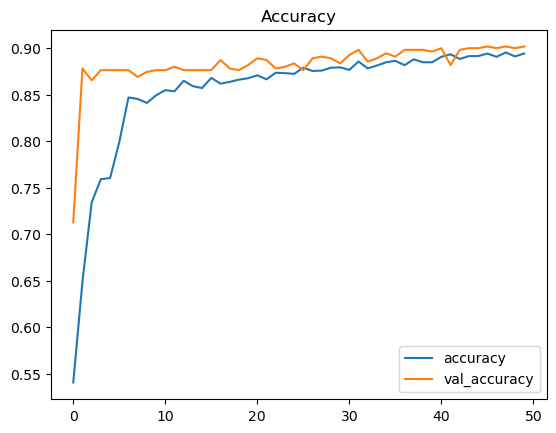

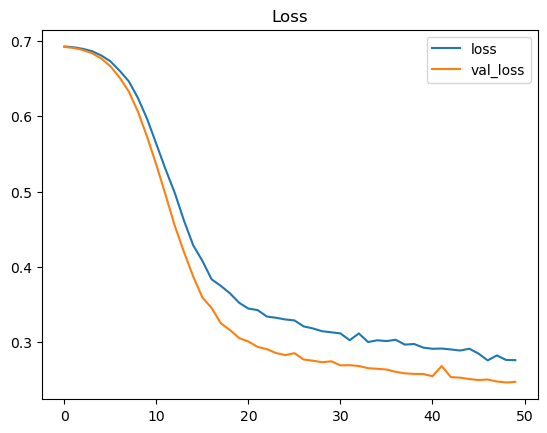

 ## Test Loss: 0.26327

## Accuracy on the test set: 88.18%



18/18 [==============================] - 2s 120ms/step


In [ ]:
pd.DataFrame(historyVGG.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(historyVGG.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

results = model2.evaluate(test_batches, verbose=0)

printmd(" ## Test Loss: {:.5f}".format(results[0]))
printmd("## Accuracy on the test set: {:.2f}%".format(results[1] * 100))
print('\n')

# Predict the label of the test_images
pred = model2.predict(test_batches)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_batches.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np

#Instantiate an empty model
model3 = Sequential()

# 1st Convolutional Layer
model3.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model3.add(Activation('relu'))
# Max Pooling
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model3.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Max Pooling
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model3.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))

# 4th Convolutional Layer
model3.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))

# 5th Convolutional Layer
model3.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Max Pooling
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model3.add(Flatten())
# 1st Fully Connected Layer
model3.add(Dense(4096, input_shape=(224*224*3,)))
model3.add(Activation('relu'))
# Add Dropout to prevent overfitting
model3.add(Dropout(0.4))

# 2nd Fully Connected Layer
model3.add(Dense(4096))
model3.add(Activation('relu'))
# Add Dropout
model3.add(Dropout(0.4))

# 3rd Fully Connected Layer
model3.add(Dense(1000))
model3.add(Activation('relu'))
# Add Dropout
model3.add(Dropout(0.4))

# Output Layer
model3.add(Dense(2))
model3.add(Activation('softmax'))
model3.summary()
     

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                  

In [ ]:
batch_size = 50 #split training data into n batches for higher performance 
epochs = 40 #one forward%backward pass of all training examples

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy']
              )

historyAlexNet  = model3.fit(train_batches,
          epochs=epochs,
           verbose=1,
          validation_data=val_batches,
          batch_size=batch_size)

Epoch 1/40
81/81 [==============================] - 200s 2s/step - loss: 0.6929 - accuracy: 0.4891 - val_loss: 0.6911 - val_accuracy: 0.4927
Epoch 2/40
81/81 [==============================] - 198s 2s/step - loss: 0.6727 - accuracy: 0.5808 - val_loss: 0.6190 - val_accuracy: 0.5745
Epoch 3/40
81/81 [==============================] - 200s 2s/step - loss: 0.5319 - accuracy: 0.7639 - val_loss: 0.4540 - val_accuracy: 0.8127
Epoch 4/40
81/81 [==============================] - 198s 2s/step - loss: 0.4482 - accuracy: 0.8181 - val_loss: 0.3580 - val_accuracy: 0.8727
Epoch 5/40
81/81 [==============================] - 198s 2s/step - loss: 0.4249 - accuracy: 0.8286 - val_loss: 0.3406 - val_accuracy: 0.8764
Epoch 6/40
81/81 [==============================] - 197s 2s/step - loss: 0.3858 - accuracy: 0.8521 - val_loss: 0.3063 - val_accuracy: 0.8873
Epoch 7/40
81/81 [==============================] - 198s 2s/step - loss: 0.3326 - accuracy: 0.8755 - val_loss: 0.2698 - val_accuracy: 0.8945
Epoch 8/40
81

In [ ]:
loss, acc = model3.evaluate_generator(test_batches, verbose=1)
print("Loss: ", loss)
print("Accuracy: ", acc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


18/18 [==============================] - 9s 497ms/step - loss: 0.2280 - accuracy: 0.9182
Loss:  0.22801993787288666
Accuracy:  0.918181836605072


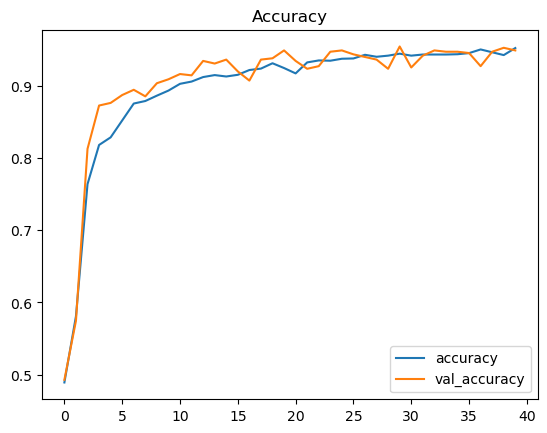

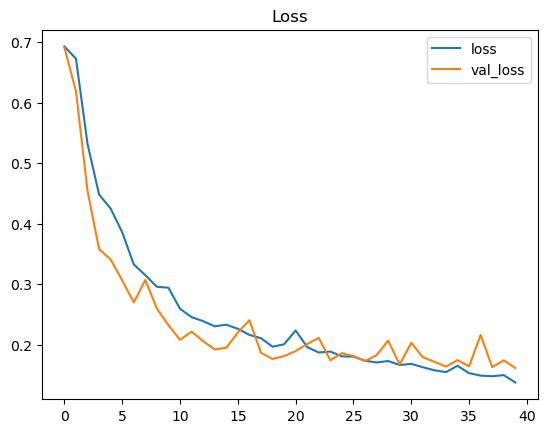

 ## Test Loss: 0.22802

## Accuracy on the test set: 91.82%



18/18 [==============================] - 10s 520ms/step


In [ ]:
pd.DataFrame(historyAlexNet.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(historyAlexNet.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

results = model3.evaluate(test_batches, verbose=0)

printmd(" ## Test Loss: {:.5f}".format(results[0]))
printmd("## Accuracy on the test set: {:.2f}%".format(results[1] * 100))
print('\n')

# Predict the label of the test_images
pred = model3.predict(test_batches)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_batches.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]


In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


def predict_class(path):
    img = cv2.imread(path)

    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0
    new_model = tf.keras.models.load_model("/kaggle/input/eye-disease-model/eye_disease_model (5).h5")
    predict=new_model.predict(np.array([image]))
    per=np.argmax(predict,axis=1)
    if per==1:
        print('No DR')
    else:
        print('DR')

1/1 [==============================] - 1s 501ms/step
No DR


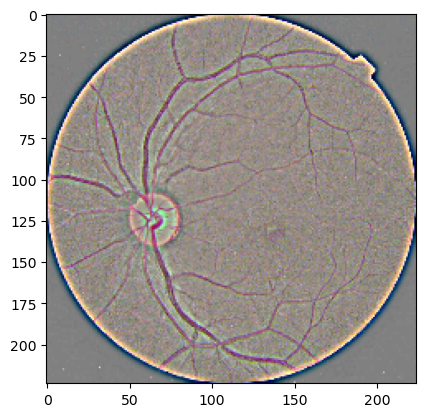

In [ ]:
#No dir
predict_class('/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/No_DR/002c21358ce6.png')

1/1 [==============================] - 0s 160ms/step
DR


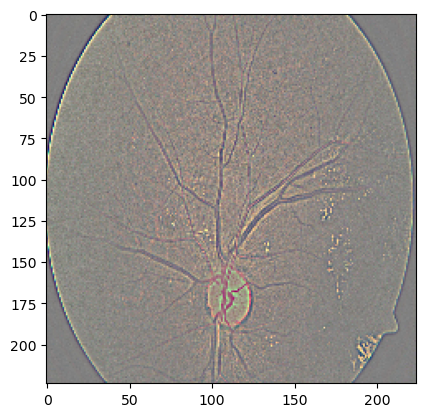

In [ ]:
#Mild dir
predict_class('/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/03e25101e8e8.png')

1/1 [==============================] - 0s 167ms/step
DR


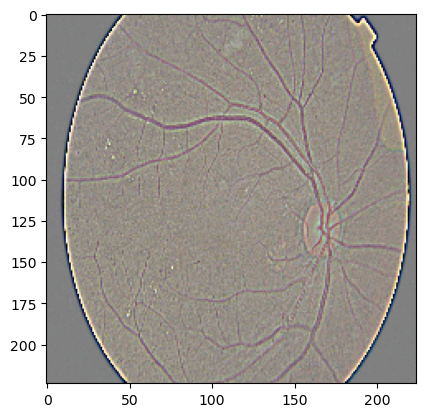

In [ ]:
#Moderated dir
predict_class('/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Moderate/00e4ddff966a.png')

1/1 [==============================] - 0s 167ms/step
DR


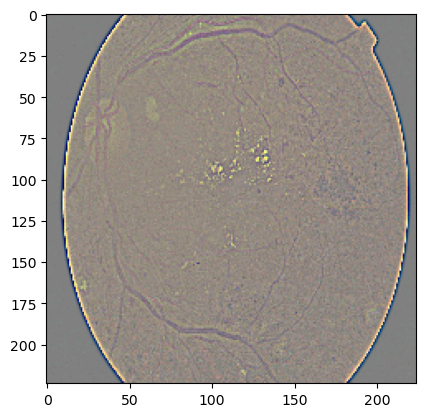

In [ ]:
#Sever dir
predict_class('/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Severe/070f67572d03.png')

1/1 [==============================] - 0s 163ms/step
DR


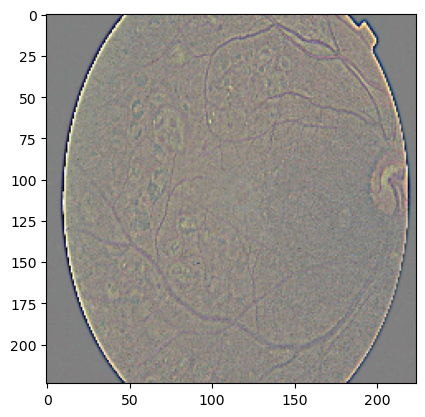

In [ ]:
#Proliferate dir
predict_class('/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR/0ceb222f6629.png')